<a href="https://colab.research.google.com/github/mahikabhartari/BA820-Project-News-Article-Text-Analysis/blob/main/Rajashree_Ramaprabu_ML_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [60]:
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
from collections import Counter

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
df = pd.read_csv('/content/drive/My Drive/BA820/MyProject/news_random_strat_pub_5perc.csv')

In [63]:
df.head()

,date,year,month,day,author,title,article,url,section,publication,random,rowcnt
0,2020-02-26 00:00:00 UTC,2020,2,26,Alex Pareene,The Selling of the Democratic Primary,The Democratic Party has a monopoly on a produ...,https://newrepublic.com/article/156676/selling...,NaN,New Republic,01beb405-44d2-4c8a-8e49-09a54ae97be8,6
1,2020-02-19 00:00:00 UTC,2020,2,19,Alex Shephard,How Michael Bloomberg Owned New York Media,Not long after he began contemplating running ...,https://newrepublic.com/article/156612/michael...,NaN,New Republic,02fc2a43-bf35-4bd1-a280-fb449c932df9,12
2,2020-02-12 00:00:00 UTC,2020,2,12,Walter Shapiro,The Media’s Lousy Election Analysis Is Damagin...,Like compulsive gamblers who react to every lo...,https://newrepublic.com/article/156558/medias-...,NaN,New Republic,05b53699-bd95-4e07-8ef3-ec06f81f322d,26
3,2020-02-14 00:00:00 UTC,2020,2,14,Libby Watson,Can Corporate America Get Behind Medicare for ...,"A few days before Christmas in 2007, Wendell P...",https://newrepublic.com/article/156381/wendell...,NaN,New Republic,08ef5585-f686-4fed-9ea7-6f11acd42f58,39
4,2020-02-25 00:00:00 UTC,2020,2,25,Kate Knibbs,Let's Have the GIF Pronunciation Debate Forever,Looking at the internet can often feel like ea...,https://www.wired.com/story/the-great-debate-g...,culture,Wired,0117cc64-5675-4632-90a2-f247c8983f24,13


In [64]:
df.shape

(85753, 12)

In [65]:
df.dtypes

date           object
year            int64
month           int64
day             int64
author         object
title          object
article        object
url            object
section        object
publication    object
random         object
rowcnt          int64
dtype: object

In [66]:
df.isna().sum()

date               0
year               0
month              0
day                0
author         26910
title              0
article         3851
url                0
section        29735
publication        0
random             0
rowcnt             0
dtype: int64

In [67]:
df.dropna(subset=['article'], inplace=True)

In [68]:
df['year'].unique()

array([2020, 2019, 2016, 2017, 2018])

In [69]:
df['author'].unique()

array(['Alex Pareene', 'Alex Shephard', 'Walter Shapiro', ...,
       'Julie Bosman, Monica Davey', 'Katla McGlynn', 'Orhan Pamuk'],
      dtype=object)

In [70]:
author_value_counts = df['author'].value_counts()
author_counts_df = author_value_counts.reset_index()
author_counts_df.columns = ['Author', 'Count']

In [71]:
author_counts_df

,Author,Count
0,Field Level Media,315
1,The Associated Press,294
2,People Staff,253
3,Axios,247
4,Dave Quinn,244
...,...,...
13834,Gaiutra Bahadur,1
13835,Jeremy B. Merrill,1
13836,"Lisa Friedman, Coral Davenport",1
13837,"Nicholas Fandos, Charlie Savage, Catie Edmonds...",1


In [72]:
df['title'].unique()

array(['The Selling of the Democratic Primary',
       'How Michael Bloomberg Owned New York Media',
       'The Media’s Lousy Election Analysis Is Damaging Political Discourse',
       ..., 'Hyde Park, N.Y.: A Gilded Age Getaway With a Friendly Vibe',
       'Mark Salling, Former ‘Glee’ Star, Is Found Dead',
       'Word + Quiz: haggard'], dtype=object)

In [73]:
title_value_counts = df['title'].value_counts()
title_counts_df = title_value_counts.reset_index()
title_counts_df.columns = ['Title', 'Count']

In [74]:
title_counts_df

,Title,Count
0,The VICE Morning Bulletin,30
1,Quotation of the Day,24
2,Stars and Scars -- You Be the Judge,17
3,Recent Commercial Real Estate Transactions,15
4,8 Things You Need To Know This AM,15
...,...,...
81205,George R.R. Martin Announced Not Four but FIVE...,1
81206,This Bird Went Extinct and Then Evolved Into E...,1
81207,The Plan to Build a Million-Year Nuclear Waste...,1
81208,How Motion City Soundtrack’s ‘Even If It Kills...,1


In [75]:
df['section'].unique()

array([nan, 'culture', 'transportation', ...,
       'ted-cruzs-iowa-bus-tour-billybobs-beef-brisket-and-the-n-s-a',
       'in-nepal-monthly-exile-for-women',
       'jan-21-2016-pictures-of-the-day'], dtype=object)

In [76]:
section_value_counts = df['section'].value_counts()
section_counts_df = section_value_counts.reset_index()
section_counts_df.columns = ['Section', 'Count']

In [77]:
section_counts_df

,Section,Count
0,World News,3429
1,Business News,2821
2,Market News,2134
3,us,2001
4,Wires,1821
...,...,...
1026,WILD NATURE,1
1027,Iran,1
1028,Homicide,1
1029,Middle East,1


In [78]:
df['publication'].unique()

array(['New Republic', 'Wired', 'Washington Post', 'Gizmodo',
       'Hyperallergic', 'TMZ', 'Economist', 'Vice News', 'Axios',
       'The Verge', 'Politico', 'The Hill', 'Buzzfeed News', 'CNBC',
       'Mashable', 'CNN', 'TechCrunch', 'Vox', 'Business Insider',
       'The New York Times', 'People', 'Reuters', 'Vice', 'Refinery 29',
       'Fox News', 'New Yorker'], dtype=object)

In [79]:
publication_value_counts = df['publication'].value_counts()
publication_counts_df = publication_value_counts.reset_index()
publication_counts_df.columns = ['Publication', 'Count']

In [80]:
publication_counts_df

,Publication,Count
0,Reuters,21994
1,The New York Times,12443
2,People,6783
3,Vice,5043
4,Refinery 29,4292
5,CNBC,3431
6,Business Insider,2895
7,CNN,2852
8,Mashable,2616
9,TechCrunch,2601


In [81]:
title_tokens = [word for title in df['title'] for word in word_tokenize(title.lower())]
title_word_freq = Counter(title_tokens)

title_word_freq.most_common(10)

[('to', 21412),
 (',', 19024),
 ('the', 16532),
 ('in', 14619),
 ('of', 12471),
 (':', 12191),
 ("'s", 11439),
 ('a', 10467),
 ('for', 9879),
 ('’', 8751)]

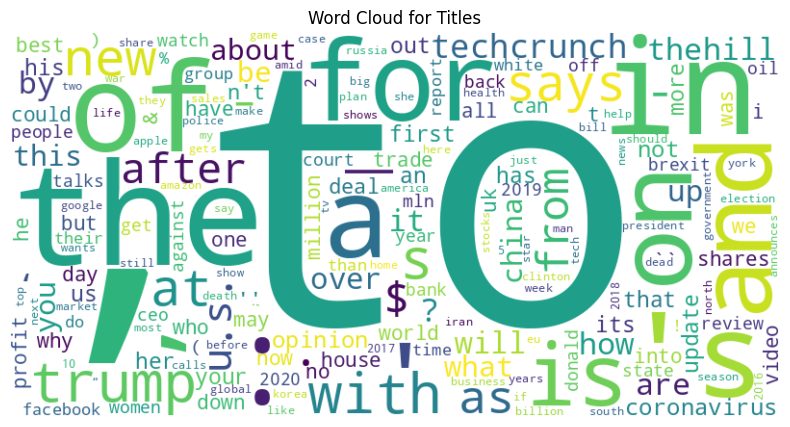

In [83]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(title_word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Titles')
plt.show()

In [88]:
df_subset = df.head(9000)

article_tokens = [word for article in df_subset['article'] for word in word_tokenize(article.lower())]
article_word_freq = Counter(article_tokens)

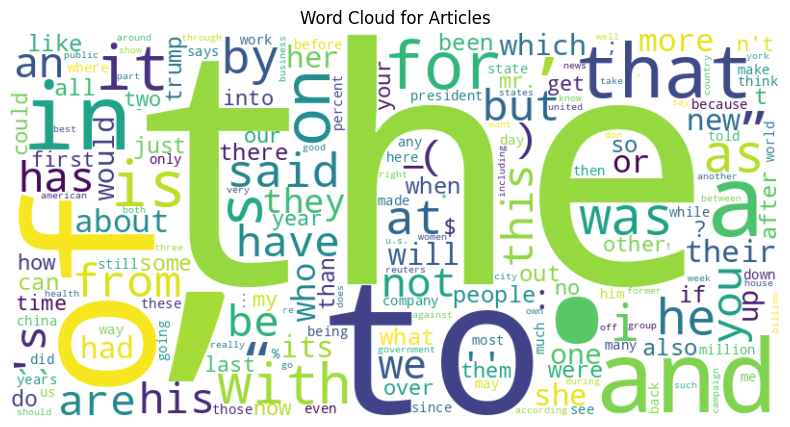

In [89]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

article_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(article_word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(article_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Articles')
plt.show()